# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations
- There is a strong correlation between temperature and latitude. In the northern hemisphere, it is a strong positive correlation. In the southern hemisphere, it is a strong negative correlation. 
- There is a weak correlation between humidity and latitude.
- There is no correlation between wind speed and latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Setup query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
#Create Lists for Data
city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Setup count
count = 0
set_count = 1

#loop to create dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if count > 48:
            count = 1
            set_count += 1
            city_list.append(city)
        else:
            count += 1
            city_list.append(city)
        print(f"Processing Record {count} of Set {set_count} | {city}")
    except:
        print(f"City not found. Skipping...")

Processing Record 1 of Set 1 | lubumbashi
Processing Record 2 of Set 1 | constitucion
Processing Record 3 of Set 1 | comodoro rivadavia
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | omboue
Processing Record 6 of Set 1 | port hedland
City not found. Skipping...
Processing Record 7 of Set 1 | lorengau
Processing Record 8 of Set 1 | mackay
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | avarua
City not found. Skipping...
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | rio grande
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | saint-louis
Processing Record 20 of Set 1 | san angelo
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | basco
Processing Record 23 of Set 1 | pemba
Proc

Processing Record 43 of Set 4 | epe
Processing Record 44 of Set 4 | tuatapere
Processing Record 45 of Set 4 | atikokan
Processing Record 46 of Set 4 | ust-nera
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | tondano
Processing Record 49 of Set 4 | bathsheba
Processing Record 1 of Set 5 | srivardhan
Processing Record 2 of Set 5 | anadyr
Processing Record 3 of Set 5 | kruisfontein
Processing Record 4 of Set 5 | lagoa
Processing Record 5 of Set 5 | jibuti
Processing Record 6 of Set 5 | carutapera
Processing Record 7 of Set 5 | pisco
Processing Record 8 of Set 5 | shakawe
Processing Record 9 of Set 5 | lebu
Processing Record 10 of Set 5 | barreirinha
Processing Record 11 of Set 5 | rabo de peixe
Processing Record 12 of Set 5 | tabas
Processing Record 13 of Set 5 | kirkuk
Processing Record 14 of Set 5 | sangar
City not found. Skipping...
Processing Record 15 of Set 5 | aklavik
Processing Record 16 of Set 5 | severo-kurilsk
Processing Record 17 of Set 5 | tons

Processing Record 38 of Set 8 | weatherford
Processing Record 39 of Set 8 | oussouye
Processing Record 40 of Set 8 | mangan
Processing Record 41 of Set 8 | west bay
Processing Record 42 of Set 8 | evensk
Processing Record 43 of Set 8 | mumford
Processing Record 44 of Set 8 | sharlyk
Processing Record 45 of Set 8 | tomatlan
Processing Record 46 of Set 8 | tigzirt
Processing Record 47 of Set 8 | pucallpa
Processing Record 48 of Set 8 | storslett
Processing Record 49 of Set 8 | pangody
Processing Record 1 of Set 9 | lamar
City not found. Skipping...
Processing Record 2 of Set 9 | hobyo
Processing Record 3 of Set 9 | qasigiannguit
Processing Record 4 of Set 9 | ngaoundere
Processing Record 5 of Set 9 | veydelevka
Processing Record 6 of Set 9 | kavarskas
Processing Record 7 of Set 9 | bac lieu
City not found. Skipping...
Processing Record 8 of Set 9 | namibe
Processing Record 9 of Set 9 | borazjan
Processing Record 10 of Set 9 | ilorin
Processing Record 11 of Set 9 | miles city
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create dictionary for DataFrame
weather_dict = {"City": city_list,
               "Latitude": lat,
               "Longitude": lng,
               "Max Temp.": max_temp,
               "Humidity": humidity,
               "Cloudiness": cloudiness,
               "Wind Speed": wind_speed,
               "Country": country,
               "Date": date}

#Create DataFrame
weather_df = pd.DataFrame(weather_dict)

weather_df.head()

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
0,lubumbashi,-11.6609,27.4794,64.06,97,100,4.34,CD,1612915772
1,constitucion,-35.3333,-72.4167,61.48,87,10,2.89,CL,1612915256
2,comodoro rivadavia,-45.8667,-67.5000,75.20,53,0,6.91,AR,1612915713
3,butaritari,3.0707,172.7902,81.37,82,50,14.32,KI,1612915772
4,omboue,-1.5746,9.2618,77.49,89,91,2.68,GA,1612915773


In [6]:
#Export to csv file
weather_df.to_csv("weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
test_data = weather_df["Humidity"].describe(include = "all")
test_data

#No reason to go on since there are no cities that have humidity > 100%

count    546.000000
mean      75.862637
std       18.201053
min       17.000000
25%       69.000000
50%       82.000000
75%       89.000000
max      100.000000
Name: Humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

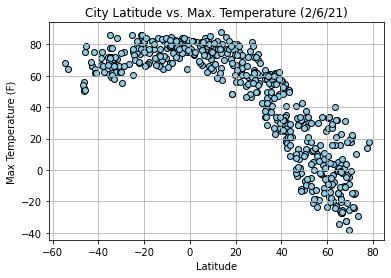

In [8]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp."], edgecolors="black", facecolors="skyblue")
plt.title("City Latitude vs. Max. Temperature (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Figures/latitude_temperature_plot.png")

## Latitude vs. Humidity Plot

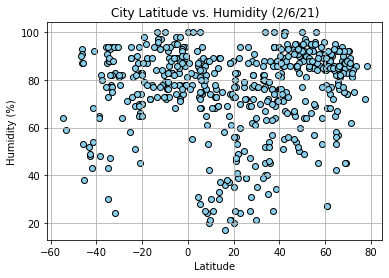

In [9]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolors="black", facecolors="skyblue")
plt.title("City Latitude vs. Humidity (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Figures/latitude_humidity_plot.png")

## Latitude vs. Cloudiness Plot

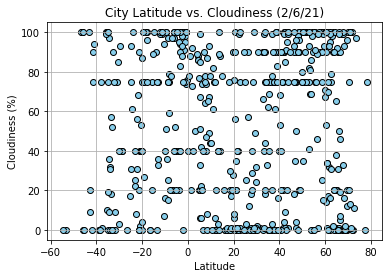

In [10]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], edgecolors="black", facecolor="skyblue")
plt.title("City Latitude vs. Cloudiness (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Figures/latitude_cloudiness_plot.png")

## Latitude vs. Wind Speed Plot

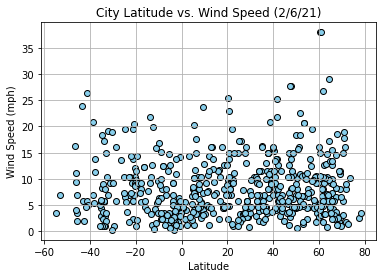

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], edgecolors="black", facecolor="skyblue")
plt.title("City Latitude vs. Wind Speed (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Figures/latitude_windspeed_plot.png")

## Linear Regression

In [12]:
northern_hemisphere = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear equation is: y = -1.47x + 93.58
The r value is: 0.7899116873737234


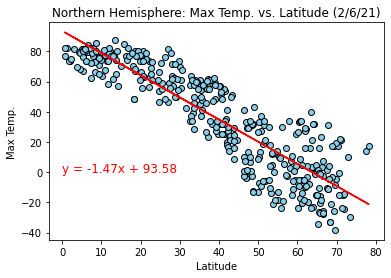

In [13]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Max Temp."]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere: Max Temp. vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq, (0,0), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/north_maxtemp_latitude_lr.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear equation is: y = 0.33x + 80.49
The r value is: 0.3408366041066292


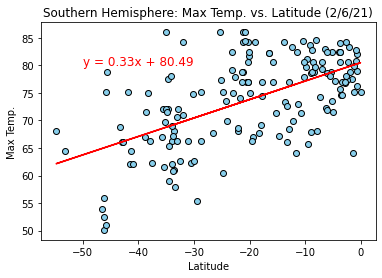

In [14]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Max Temp."]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Max Temp. vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq, (-50,80), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/south_maxtemp_latitude_lr.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear equation is: y = 0.3x + 62.32
The r value is: 0.10027083092747709


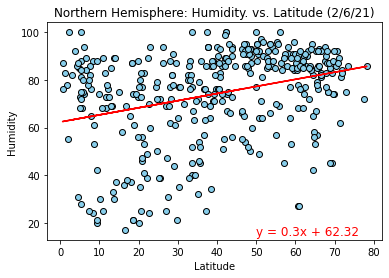

In [15]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, 'r-')
plt.title("Northern Hemisphere: Humidity. vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (50,15), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/north_humidity_latitude_lr.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear equation is: y = 0.36x + 86.99
The r value is: 0.12701734540207113


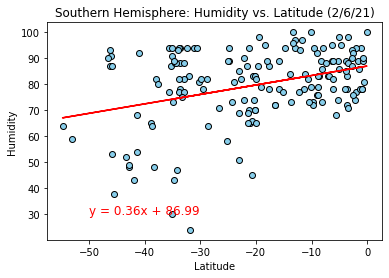

In [16]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Humidity vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (-50,30), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/south_humidity_latitude_lr.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear equation is: y = 0.22x + 42.8
The r value is: 0.013178055304647223


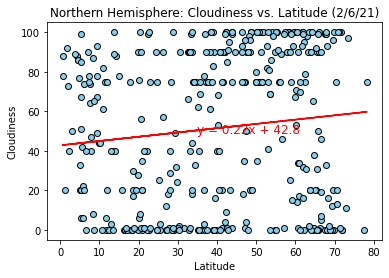

In [17]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, 'r-')
plt.title("Northern Hemisphere: Cloudiness vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (35,49), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/north_cloudiness_latitude_lr.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear equation is: y = 0.84x + 72.49
The r value is: 0.09425531263290902


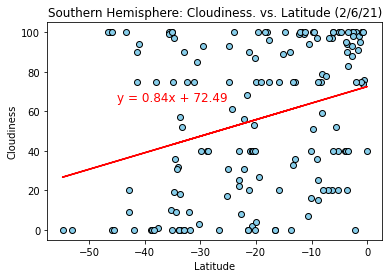

In [18]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Cloudiness. vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (-45,65), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/south_cloudiness_latitude_lr.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear equation is: y = 0.01x + 7.91
The r value is: 0.002264622006173395


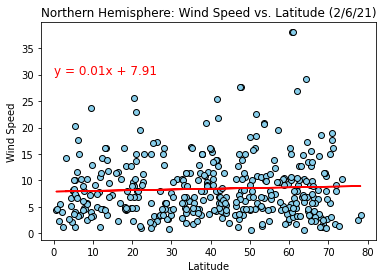

In [19]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, 'r-')
plt.title("Northern Hemisphere: Wind Speed vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (0,30), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/north_windspeed_latitude_lr.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear equation is: y = -0.06x + 6.29
The r value is: 0.025894018313073062


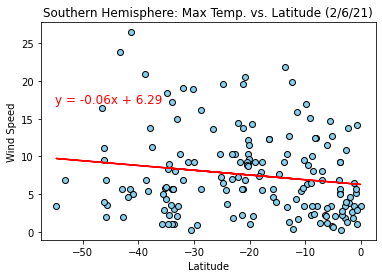

In [20]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="skyblue")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Max Temp. vs. Latitude (2/6/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (-55,17), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("Figures/south_windspeed_latitude_lr.png")